<a href="https://colab.research.google.com/github/IamShivamJaiswal/sign-board/blob/master/SignBoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data from drive

In [2]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

SyntaxError: invalid syntax (<ipython-input-2-ce9f63951921>, line 6)

In [ ]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1Z6Qxr-q-F54iYB2G1AyoDymBh64f5REZ'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("real_Image_dataset_Detection.tar.7z")

## Extracting the file

In [3]:
!7z x real_Image_dataset_Detection.tar.7z
!tar -xvf /content/real_Image_dataset_Detection.tar


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 46303949 bytes (45 MiB)

Extracting archive: real_Image_dataset_Detection.tar.7z
--
Path = real_Image_dataset_Detection.tar.7z
Type = 7z
Physical Size = 46303949
Headers Size = 166
Method = LZMA:24
Solid = -
Blocks = 1

  0%      6%     12% - real_Image_dataset_Detection.tar                                        19% - real_Image_dataset_Detection.tar                                        25% - real_Image_dataset_Detection.tar                                        32% 

In [5]:
%cat /content/real_Image_dataset_Detection/readme.txt

- This dataset consists of 428 real images in the image folder. Annotation corresponding to image presents in Annotation folder.
- The Annotation for the image has the same name that of the image just with the difference of extension. For example, if the image name is "1.jpg" then the corresponding annotation will be "1.txt".
- The format for the storage of the annotation file is as such.
- The no. of the line in annotation line denotes no of bounding box presents.
- A single line represents a single bounding box. format is as follow x1, x2, x3, x4, y1, y2, y3, y4, groundTruth::Language. Where (x1,y1) is the top left, (x2,y2) is top right, (x3,y3) bottom right, (x4,y4) bottom left.
- the order of point is in the clockwise order starting from the top-left points.
- if the text is not recognizable or ground truth is not known, the ## is used for that representation.
- For all of the image in the ground, truth is considered as ## only.
- Though in most of the bounding box Hindi is the lan

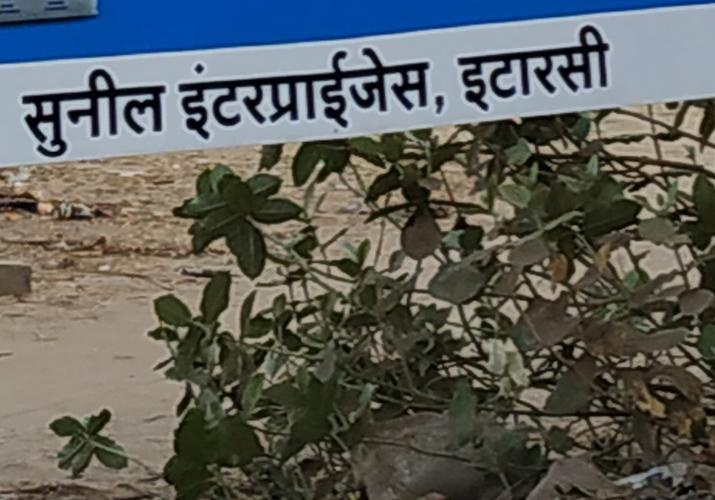

In [7]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread("real_Image_dataset_Detection/Image/1.jpg")
cv2_imshow(img)

In [10]:
%cat real_Image_dataset_Detection/Annotation/1.txt

13,162,169,30,70,61,143,160,##::HINDI
174,435,449,183,59,39,116,145,##::HINDI
448,607,620,463,35,21,94,115,##::HINDI


# Importing the github library

In [ ]:
!git clone https://github.com/sergiomsilva/alpr-unconstrained

Cloning into 'alpr-unconstrained'...
remote: Enumerating objects: 290, done.
remote: Total 290 (delta 0), reused 0 (delta 0), pack-reused 290
Receiving objects: 100% (290/290), 2.62 MiB | 2.11 MiB/s, done.
Resolving deltas: 100% (91/91), done.


In [ ]:
%cd alpr-unconstrained/darknet/
!make 

/content/alpr-unconstrained/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-re

In [ ]:
%cd /content/alpr-unconstrained/
!mkdir models

/content/alpr-unconstrained
mkdir: cannot create directory ‘models’: File exists


In [ ]:
!python create-model.py eccv models/eccv-model-scracth

Using TensorFlow backend.
Creating model eccv
W0828 12:56:19.970669 140114987476864 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 12:56:20.016458 140114987476864 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 12:56:20.017039 140114987476864 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 12:56:20.058427 140114987476864 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_sess

In [ ]:
#!rm training_samples/*
#!mv real_Image_dataset_Detection/Image/*.jpg training_samples/
#!mv real_Image_dataset_Detection/Annotation/*.txt training_samples/

In [ ]:
!python train-detector.py --model models/my-trained-model/my-trained-model_backup --name my-trained-model \
 --train-dir samples/train-detector --output-dir models/my-trained-model/ -op Adam -lr .0001 -its 300000 -bs 64

Using TensorFlow backend.
W0828 14:01:40.095638 140650333063040 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 14:01:40.179282 140650333063040 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 14:01:40.203507 140650333063040 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 14:01:40.203685 140650333063040 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0828

In [ ]:
!cp samples/train-detector/1*.jpg /content/real_Image_dataset_Detection/Image/

In [ ]:
!python license-plate-detection.py /content/real_Image_dataset_Detection/Image/ /content/alpr-unconstrained/models/my-trained-model/my-trained-model_backup

Using TensorFlow backend.
W0828 14:18:53.194962 140389948934016 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 14:18:53.215127 140389948934016 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 14:18:53.320954 140389948934016 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 14:18:53.321214 140389948934016 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0828

In [ ]:
%%writefile /content/alpr-unconstrained/license-plate-detection.py

import sys, os
import keras
import cv2
import traceback

from src.keras_utils 			import load_model
from glob 						import glob
from os.path 					import splitext, basename
from src.utils 					import im2single
from src.keras_utils 			import load_model, detect_lp
from src.label 					import Shape, writeShapes


def adjust_pts(pts,lroi):
	return pts*lroi.wh().reshape((2,1)) + lroi.tl().reshape((2,1))


if __name__ == '__main__':

	try:
		
		input_dir  = sys.argv[1]
		output_dir = input_dir

		lp_threshold = .5

		wpod_net_path = sys.argv[2]
		wpod_net = load_model(wpod_net_path)

		imgs_paths = glob('%s/*' % input_dir)

		print 'Searching for license plates using WPOD-NET'

		for i,img_path in enumerate(imgs_paths):

			print '\t Processing %s' % img_path

			bname = splitext(basename(img_path))[0]
			Ivehicle = cv2.imread(img_path)

			ratio = float(max(Ivehicle.shape[:2]))/min(Ivehicle.shape[:2])
			side  = int(ratio*288.)
			bound_dim = min(side + (side%(2**4)),608)
			print "\t\tBound dim: %d, ratio: %f" % (bound_dim,ratio)

			Llp,LlpImgs,_ = detect_lp(wpod_net,im2single(Ivehicle),bound_dim,2**4,(240,80),lp_threshold)

			if len(LlpImgs):
				Ilp = LlpImgs[0]
				Ilp = cv2.cvtColor(Ilp, cv2.COLOR_BGR2GRAY)
				Ilp = cv2.cvtColor(Ilp, cv2.COLOR_GRAY2BGR)

				s = Shape(Llp[0].pts)

				cv2.imwrite('%s/%s_lp.png' % (output_dir,bname),Ilp*255.)
				writeShapes('%s/%s_lp.txt' % (output_dir,bname),[s])

	except:
		traceback.print_exc()
		sys.exit(1)

	sys.exit(0)


Overwriting /content/alpr-unconstrained/license-plate-detection.py


In [ ]:
%%writefile /content/alpr-unconstrained/src/label.py

import numpy as np

from os.path import isfile


class Label:

	def __init__(self,cl=-1,tl=np.array([0.,0.]),br=np.array([0.,0.]),prob=None):
		self.__tl 	= tl
		self.__br 	= br
		self.__cl 	= cl
		self.__prob = prob

	def __str__(self):
		return 'Class: %d, top_left(x:%f,y:%f), bottom_right(x:%f,y:%f)' % (self.__cl, self.__tl[0], self.__tl[1], self.__br[0], self.__br[1])

	def copy(self):
		return Label(self.__cl,self.__tl,self.__br)

	def wh(self): return self.__br-self.__tl

	def cc(self): return self.__tl + self.wh()/2

	def tl(self): return self.__tl
 
	def br(self): return self.__br

	def tr(self): return np.array([self.__br[0],self.__tl[1]])

	def bl(self): return np.array([self.__tl[0],self.__br[1]])

	def cl(self): return self.__cl

	def area(self): return np.prod(self.wh())

	def prob(self): return self.__prob

	def set_class(self,cl):
		self.__cl = cl

	def set_tl(self,tl):
		self.__tl = tl

	def set_br(self,br):
		self.__br = br

	def set_wh(self,wh):
		cc = self.cc()
		self.__tl = cc - .5*wh
		self.__br = cc + .5*wh

	def set_prob(self,prob):
		self.__prob = prob


def lread(file_path,label_type=Label):

	if not isfile(file_path):
		return []

	objs = []
	with open(file_path,'r') as fd:
		for line in fd:
			v 		= line.strip().split()
			cl 		= int(v[0])
			ccx,ccy = float(v[1]),float(v[2])
			w,h 	= float(v[3]),float(v[4])
			prob 	= float(v[5]) if len(v) == 6 else None

			cc 	= np.array([ccx,ccy])
			wh 	= np.array([w,h])

			objs.append(label_type(cl,cc-wh/2,cc+wh/2,prob=prob))

	return objs

def lwrite(file_path,labels,write_probs=True):
	with open(file_path,'w') as fd:
		for l in labels:
			cc,wh,cl,prob = (l.cc(),l.wh(),l.cl(),l.prob())
			if prob != None and write_probs:
				fd.write('%d %f %f %f %f %f\n' % (cl,cc[0],cc[1],wh[0],wh[1],prob))
			else:
				fd.write('%d %f %f %f %f\n' % (cl,cc[0],cc[1],wh[0],wh[1]))


def dknet_label_conversion(R,img_width,img_height):
	WH = np.array([img_width,img_height],dtype=float)
	L  = []
	for r in R:
		center = np.array(r[2][:2])/WH
		wh2 = (np.array(r[2][2:])/WH)*.5
		L.append(Label(ord(r[0]),tl=center-wh2,br=center+wh2,prob=r[1]))
	return L


class Shape():

	def __init__(self,pts=np.zeros((2,0)),max_sides=4,text=''):
		self.pts = pts
		self.max_sides = max_sides
		self.text = text

	def isValid(self):
		return self.pts.shape[1] > 2

	def write(self,fp):
		fp.write('%d,' % self.pts.shape[1])
		ptsarray = self.pts.flatten()
		fp.write(''.join([('%f,' % value) for value in ptsarray]))
		fp.write('%s,' % self.text)
		fp.write('\n')

	def read(self,line):
		data 		= line.strip().split(',')
		ss 			= 4
		values 		= data[:ss*2]
		text 		= data[-1].split("::")[-1]
		self.pts 	= np.array([float(value) for value in values]).reshape((2,ss))
		self.text   = text

def readShapes(path,obj_type=Shape):
	shapes = []
	with open(path) as fp:
		for line in fp:
			shape = obj_type()
			shape.read(line)
			shapes.append(shape)
	return shapes

def writeShapes(path,shapes):
	if len(shapes):
		with open(path,'w') as fp:
			for shape in shapes:
				if shape.isValid():
					shape.write(fp)

Overwriting /content/alpr-unconstrained/src/label.py


# With East

In [11]:
!git clone https://github.com/argman/EAST/

Cloning into 'EAST'...
remote: Enumerating objects: 267, done.
remote: Total 267 (delta 0), reused 0 (delta 0), pack-reused 267
Receiving objects: 100% (267/267), 2.00 MiB | 22.72 MiB/s, done.
Resolving deltas: 100% (125/125), done.


In [12]:
%cd EAST/

/content/EAST


In [ ]:
#https://drive.google.com/open?id=0B3APw5BZJ67ETHNPaU9xUkVoV0U
  # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '0B3APw5BZJ67ETHNPaU9xUkVoV0U'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("weights.zip")

In [14]:
!unzip weights.zip

Archive:  weights.zip
  inflating: east_icdar2015_resnet_v1_50_rbox/checkpoint  
  inflating: east_icdar2015_resnet_v1_50_rbox/model.ckpt-49491.data-00000-of-00001  
  inflating: east_icdar2015_resnet_v1_50_rbox/model.ckpt-49491.index  
  inflating: east_icdar2015_resnet_v1_50_rbox/model.ckpt-49491.meta  


In [ ]:
#!rm /tmp/east_icdar2015_resnet_v1_50_rbox/*

In [ ]:
!cp /content/EAST/east_icdar2015_resnet_v1_50_rbox/checkpoint /tmp/east_icdar2015_resnet_v1_50_rbox/

In [ ]:
!rm training_samples/*
!mv /content/real_Image_dataset_Detection/Image/*.jpg training_samples/
!mv /content/real_Image_dataset_Detection/Annotation/*.txt training_samples/

In [36]:
!python multigpu_train.py --gpu_list=0 --input_size=512 --batch_size_per_gpu=14 --checkpoint_path=/content/EAST/east_icdar2015_resnet_v1_50_rbox/ \
--text_scale=512 --training_data_path=training_samples/ --geometry=RBOX --learning_rate=0.0001 --num_readers=1 \
--pretrained_model_path=/content/EAST/east_icdar2015_resnet_v1_50_rbox/model.ckpt-49491  

W0829 06:49:46.417193 139965926725504 deprecation_wrapper.py:119] From multigpu_train.py:183: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0829 06:49:46.417866 139965926725504 deprecation_wrapper.py:119] From multigpu_train.py:74: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.

W0829 06:49:46.418112 139965926725504 deprecation_wrapper.py:119] From multigpu_train.py:81: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 06:49:46.421767 139965926725504 deprecation_wrapper.py:119] From multigpu_train.py:89: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0829 06:49:46.426924 139965926725504 deprecation_wrapper.py:119] From multigpu_train.py:90: The name tf.train.exponential_decay is deprecated. Please use tf.compat.v1.train.exponential_decay instead.

W0829 06:49:46.432703 139965926725504 deprecation_wrapper.py:119] From multigpu_train.py:92: The

In [30]:
%%writefile multigpu_train.py

from tqdm import tqdm
import time
import numpy as np
import tensorflow as tf
from tensorflow.contrib import slim

tf.app.flags.DEFINE_integer('input_size', 512, '')
tf.app.flags.DEFINE_integer('batch_size_per_gpu', 14, '')
tf.app.flags.DEFINE_integer('num_readers', 16, '')
tf.app.flags.DEFINE_float('learning_rate', 0.0001, '')
tf.app.flags.DEFINE_integer('max_steps', 100000, '')
tf.app.flags.DEFINE_float('moving_average_decay', 0.997, '')
tf.app.flags.DEFINE_string('gpu_list', '1', '')
tf.app.flags.DEFINE_string('checkpoint_path', '/tmp/east_resnet_v1_50_rbox/', '')
tf.app.flags.DEFINE_boolean('restore', False, 'whether to resotre from checkpoint')
tf.app.flags.DEFINE_integer('save_checkpoint_steps', 50, '')
tf.app.flags.DEFINE_integer('save_summary_steps', 100, '')
tf.app.flags.DEFINE_string('pretrained_model_path', None, '')

import model
import icdar

FLAGS = tf.app.flags.FLAGS

gpus = list(range(len(FLAGS.gpu_list.split(','))))


def tower_loss(images, score_maps, geo_maps, training_masks, reuse_variables=None):
    # Build inference graph
    with tf.variable_scope(tf.get_variable_scope(), reuse=reuse_variables):
        f_score, f_geometry = model.model(images, is_training=True)

    model_loss = model.loss(score_maps, f_score,
                            geo_maps, f_geometry,
                            training_masks)
    total_loss = tf.add_n([model_loss] + tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES))

    # add summary
    if reuse_variables is None:
        tf.summary.image('input', images)
        tf.summary.image('score_map', score_maps)
        tf.summary.image('score_map_pred', f_score * 255)
        tf.summary.image('geo_map_0', geo_maps[:, :, :, 0:1])
        tf.summary.image('geo_map_0_pred', f_geometry[:, :, :, 0:1])
        tf.summary.image('training_masks', training_masks)
        tf.summary.scalar('model_loss', model_loss)
        tf.summary.scalar('total_loss', total_loss)

    return total_loss, model_loss


def average_gradients(tower_grads):
    average_grads = []
    for grad_and_vars in zip(*tower_grads):
        grads = []
        for g, _ in grad_and_vars:
            expanded_g = tf.expand_dims(g, 0)
            grads.append(expanded_g)

        grad = tf.concat(grads, 0)
        grad = tf.reduce_mean(grad, 0)

        v = grad_and_vars[0][1]
        grad_and_var = (grad, v)
        average_grads.append(grad_and_var)

    return average_grads


def main(argv=None):
    import os
    os.environ['CUDA_VISIBLE_DEVICES'] = FLAGS.gpu_list
    if not tf.gfile.Exists(FLAGS.checkpoint_path):
        tf.gfile.MkDir(FLAGS.checkpoint_path)
    else:
        if not FLAGS.restore:
            tf.gfile.DeleteRecursively(FLAGS.checkpoint_path)
            tf.gfile.MkDir(FLAGS.checkpoint_path)

    input_images = tf.placeholder(tf.float32, shape=[None, None, None, 3], name='input_images')
    input_score_maps = tf.placeholder(tf.float32, shape=[None, None, None, 1], name='input_score_maps')
    if FLAGS.geometry == 'RBOX':
        input_geo_maps = tf.placeholder(tf.float32, shape=[None, None, None, 5], name='input_geo_maps')
    else:
        input_geo_maps = tf.placeholder(tf.float32, shape=[None, None, None, 8], name='input_geo_maps')
    input_training_masks = tf.placeholder(tf.float32, shape=[None, None, None, 1], name='input_training_masks')

    global_step = tf.get_variable('global_step', [], initializer=tf.constant_initializer(0), trainable=False)
    learning_rate = tf.train.exponential_decay(FLAGS.learning_rate, global_step, decay_steps=10000, decay_rate=0.94, staircase=True)
    # add summary
    tf.summary.scalar('learning_rate', learning_rate)
    opt = tf.train.AdamOptimizer(learning_rate)
    # opt = tf.train.MomentumOptimizer(learning_rate, 0.9)


    # split
    input_images_split = tf.split(input_images, len(gpus))
    input_score_maps_split = tf.split(input_score_maps, len(gpus))
    input_geo_maps_split = tf.split(input_geo_maps, len(gpus))
    input_training_masks_split = tf.split(input_training_masks, len(gpus))

    tower_grads = []
    reuse_variables = None
    for i, gpu_id in enumerate(gpus):
        with tf.device('/gpu:%d' % gpu_id):
            with tf.name_scope('model_%d' % gpu_id) as scope:
                iis = input_images_split[i]
                isms = input_score_maps_split[i]
                igms = input_geo_maps_split[i]
                itms = input_training_masks_split[i]
                total_loss, model_loss = tower_loss(iis, isms, igms, itms, reuse_variables)
                batch_norm_updates_op = tf.group(*tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope))
                reuse_variables = True

                grads = opt.compute_gradients(total_loss)
                tower_grads.append(grads)

    grads = average_gradients(tower_grads)
    apply_gradient_op = opt.apply_gradients(grads, global_step=global_step)

    summary_op = tf.summary.merge_all()
    # save moving average
    variable_averages = tf.train.ExponentialMovingAverage(
        FLAGS.moving_average_decay, global_step)
    variables_averages_op = variable_averages.apply(tf.trainable_variables())
    # batch norm updates
    with tf.control_dependencies([variables_averages_op, apply_gradient_op, batch_norm_updates_op]):
        train_op = tf.no_op(name='train_op')

    saver = tf.train.Saver(tf.global_variables())
    summary_writer = tf.summary.FileWriter(FLAGS.checkpoint_path, tf.get_default_graph())

    init = tf.global_variables_initializer()

    if FLAGS.pretrained_model_path is not None:
        variable_restore_op = slim.assign_from_checkpoint_fn(FLAGS.pretrained_model_path, slim.get_trainable_variables(),
                                                             ignore_missing_vars=True)
    with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
        if FLAGS.restore:
            print('continue training from previous checkpoint')
            print(FLAGS.checkpoint_path)
            ckpt = tf.train.latest_checkpoint(FLAGS.checkpoint_path)
            saver.restore(sess, ckpt)
        else:
            sess.run(init)
            if FLAGS.pretrained_model_path is not None:
                variable_restore_op(sess)

        data_generator = icdar.get_batch(num_workers=FLAGS.num_readers,
                                         input_size=FLAGS.input_size,
                                         batch_size=FLAGS.batch_size_per_gpu * len(gpus))

        start = time.time()
        for step in tqdm(range(FLAGS.max_steps)):
            data = next(data_generator)
            ml, tl, _ = sess.run([model_loss, total_loss, train_op], feed_dict={input_images: data[0],
                                                                                input_score_maps: data[2],
                                                                                input_geo_maps: data[3],
                                                                                input_training_masks: data[4]})
            if np.isnan(tl):
                print('Loss diverged, stop training')
                break

            if step % 10 == 0:
                avg_time_per_step = (time.time() - start)/10
                avg_examples_per_second = (10 * FLAGS.batch_size_per_gpu * len(gpus))/(time.time() - start)
                start = time.time()
                print('Step {:06d}, model loss {:.4f}, total loss {:.4f}, {:.2f} seconds/step, {:.2f} examples/second'.format(
                    step, ml, tl, avg_time_per_step, avg_examples_per_second))

            if step % FLAGS.save_checkpoint_steps == 0:
                saver.save(sess, FLAGS.checkpoint_path + 'model.ckpt', global_step=global_step)

            if step % FLAGS.save_summary_steps == 0:
                _, tl, summary_str = sess.run([train_op, total_loss, summary_op], feed_dict={input_images: data[0],
                                                                                             input_score_maps: data[2],
                                                                                             input_geo_maps: data[3],
                                                                                             input_training_masks: data[4]})
                summary_writer.add_summary(summary_str, global_step=step)

if __name__ == '__main__':
    tf.app.run()



Overwriting multigpu_train.py


In [21]:
%%writefile icdar.py

# coding:utf-8
import glob
import csv
import cv2
import time
import os
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib.patches as Patches
from shapely.geometry import Polygon

import tensorflow as tf

from data_util import GeneratorEnqueuer

tf.app.flags.DEFINE_string('training_data_path', '/data/ocr/icdar2015/',
                           'training dataset to use')
tf.app.flags.DEFINE_integer('max_image_large_side', 1280,
                            'max image size of training')
tf.app.flags.DEFINE_integer('max_text_size', 800,
                            'if the text in the input image is bigger than this, then we resize'
                            'the image according to this')
tf.app.flags.DEFINE_integer('min_text_size', 10,
                            'if the text size is smaller than this, we ignore it during training')
tf.app.flags.DEFINE_float('min_crop_side_ratio', 0.1,
                          'when doing random crop from input image, the'
                          'min length of min(H, W')
tf.app.flags.DEFINE_string('geometry', 'RBOX',
                           'which geometry to generate, RBOX or QUAD')


FLAGS = tf.app.flags.FLAGS


def get_images():
    files = []
    for ext in ['jpg', 'png', 'jpeg', 'JPG']:
        files.extend(glob.glob(
            os.path.join(FLAGS.training_data_path, '*.{}'.format(ext))))
    return files


def load_annoataion(p):
    '''
    load annotation from the text file
    :param p:
    :return:
    '''
    text_polys = []
    text_tags = []
    if not os.path.exists(p):
        return np.array(text_polys, dtype=np.float32)
    with open(p, 'r') as f:
        reader = csv.reader(f)
        for line in reader:
            label = line[-1]
            # strip BOM. \ufeff for python3,  \xef\xbb\bf for python2
            line = [i.strip('\ufeff').strip('\xef\xbb\xbf') for i in line]

            x1, y1, x2, y2, x3, y3, x4, y4 = list(map(float, line[:8]))
            text_polys.append([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
            if label == '*' or label == '###':
                text_tags.append(True)
            else:
                text_tags.append(False)
        return np.array(text_polys, dtype=np.float32), np.array(text_tags, dtype=np.bool)


def polygon_area(poly):
    '''
    compute area of a polygon
    :param poly:
    :return:
    '''
    edge = [
        (poly[1][0] - poly[0][0]) * (poly[1][1] + poly[0][1]),
        (poly[2][0] - poly[1][0]) * (poly[2][1] + poly[1][1]),
        (poly[3][0] - poly[2][0]) * (poly[3][1] + poly[2][1]),
        (poly[0][0] - poly[3][0]) * (poly[0][1] + poly[3][1])
    ]
    return np.sum(edge)/2.


def check_and_validate_polys(polys, tags, xxx_todo_changeme):
    '''
    check so that the text poly is in the same direction,
    and also filter some invalid polygons
    :param polys:
    :param tags:
    :return:
    '''
    (h, w) = xxx_todo_changeme
    if polys.shape[0] == 0:
        return polys
    polys[:, :, 0] = np.clip(polys[:, :, 0], 0, w-1)
    polys[:, :, 1] = np.clip(polys[:, :, 1], 0, h-1)

    validated_polys = []
    validated_tags = []
    for poly, tag in zip(polys, tags):
        p_area = polygon_area(poly)
        if abs(p_area) < 1:
            # print poly
            print('invalid poly')
            continue
        if p_area > 0:
            #print('poly in wrong direction')
            poly = poly[(0, 3, 2, 1), :]
        validated_polys.append(poly)
        validated_tags.append(tag)
    return np.array(validated_polys), np.array(validated_tags)


def crop_area(im, polys, tags, crop_background=False, max_tries=50):
    '''
    make random crop from the input image
    :param im:
    :param polys:
    :param tags:
    :param crop_background:
    :param max_tries:
    :return:
    '''
    h, w, _ = im.shape
    pad_h = h//10
    pad_w = w//10
    h_array = np.zeros((h + pad_h*2), dtype=np.int32)
    w_array = np.zeros((w + pad_w*2), dtype=np.int32)
    for poly in polys:
        poly = np.round(poly, decimals=0).astype(np.int32)
        minx = np.min(poly[:, 0])
        maxx = np.max(poly[:, 0])
        w_array[minx+pad_w:maxx+pad_w] = 1
        miny = np.min(poly[:, 1])
        maxy = np.max(poly[:, 1])
        h_array[miny+pad_h:maxy+pad_h] = 1
    # ensure the cropped area not across a text
    h_axis = np.where(h_array == 0)[0]
    w_axis = np.where(w_array == 0)[0]
    if len(h_axis) == 0 or len(w_axis) == 0:
        return im, polys, tags
    for i in range(max_tries):
        xx = np.random.choice(w_axis, size=2)
        xmin = np.min(xx) - pad_w
        xmax = np.max(xx) - pad_w
        xmin = np.clip(xmin, 0, w-1)
        xmax = np.clip(xmax, 0, w-1)
        yy = np.random.choice(h_axis, size=2)
        ymin = np.min(yy) - pad_h
        ymax = np.max(yy) - pad_h
        ymin = np.clip(ymin, 0, h-1)
        ymax = np.clip(ymax, 0, h-1)
        if xmax - xmin < FLAGS.min_crop_side_ratio*w or ymax - ymin < FLAGS.min_crop_side_ratio*h:
            # area too small
            continue
        if polys.shape[0] != 0:
            poly_axis_in_area = (polys[:, :, 0] >= xmin) & (polys[:, :, 0] <= xmax) \
                                & (polys[:, :, 1] >= ymin) & (polys[:, :, 1] <= ymax)
            selected_polys = np.where(np.sum(poly_axis_in_area, axis=1) == 4)[0]
        else:
            selected_polys = []
        if len(selected_polys) == 0:
            # no text in this area
            if crop_background:
                return im[ymin:ymax+1, xmin:xmax+1, :], polys[selected_polys], tags[selected_polys]
            else:
                continue
        im = im[ymin:ymax+1, xmin:xmax+1, :]
        polys = polys[selected_polys]
        tags = tags[selected_polys]
        polys[:, :, 0] -= xmin
        polys[:, :, 1] -= ymin
        return im, polys, tags

    return im, polys, tags


def shrink_poly(poly, r):
    '''
    fit a poly inside the origin poly, maybe bugs here...
    used for generate the score map
    :param poly: the text poly
    :param r: r in the paper
    :return: the shrinked poly
    '''
    # shrink ratio
    R = 0.3
    # find the longer pair
    if np.linalg.norm(poly[0] - poly[1]) + np.linalg.norm(poly[2] - poly[3]) > \
                    np.linalg.norm(poly[0] - poly[3]) + np.linalg.norm(poly[1] - poly[2]):
        # first move (p0, p1), (p2, p3), then (p0, p3), (p1, p2)
        ## p0, p1
        theta = np.arctan2((poly[1][1] - poly[0][1]), (poly[1][0] - poly[0][0]))
        poly[0][0] += R * r[0] * np.cos(theta)
        poly[0][1] += R * r[0] * np.sin(theta)
        poly[1][0] -= R * r[1] * np.cos(theta)
        poly[1][1] -= R * r[1] * np.sin(theta)
        ## p2, p3
        theta = np.arctan2((poly[2][1] - poly[3][1]), (poly[2][0] - poly[3][0]))
        poly[3][0] += R * r[3] * np.cos(theta)
        poly[3][1] += R * r[3] * np.sin(theta)
        poly[2][0] -= R * r[2] * np.cos(theta)
        poly[2][1] -= R * r[2] * np.sin(theta)
        ## p0, p3
        theta = np.arctan2((poly[3][0] - poly[0][0]), (poly[3][1] - poly[0][1]))
        poly[0][0] += R * r[0] * np.sin(theta)
        poly[0][1] += R * r[0] * np.cos(theta)
        poly[3][0] -= R * r[3] * np.sin(theta)
        poly[3][1] -= R * r[3] * np.cos(theta)
        ## p1, p2
        theta = np.arctan2((poly[2][0] - poly[1][0]), (poly[2][1] - poly[1][1]))
        poly[1][0] += R * r[1] * np.sin(theta)
        poly[1][1] += R * r[1] * np.cos(theta)
        poly[2][0] -= R * r[2] * np.sin(theta)
        poly[2][1] -= R * r[2] * np.cos(theta)
    else:
        ## p0, p3
        # print poly
        theta = np.arctan2((poly[3][0] - poly[0][0]), (poly[3][1] - poly[0][1]))
        poly[0][0] += R * r[0] * np.sin(theta)
        poly[0][1] += R * r[0] * np.cos(theta)
        poly[3][0] -= R * r[3] * np.sin(theta)
        poly[3][1] -= R * r[3] * np.cos(theta)
        ## p1, p2
        theta = np.arctan2((poly[2][0] - poly[1][0]), (poly[2][1] - poly[1][1]))
        poly[1][0] += R * r[1] * np.sin(theta)
        poly[1][1] += R * r[1] * np.cos(theta)
        poly[2][0] -= R * r[2] * np.sin(theta)
        poly[2][1] -= R * r[2] * np.cos(theta)
        ## p0, p1
        theta = np.arctan2((poly[1][1] - poly[0][1]), (poly[1][0] - poly[0][0]))
        poly[0][0] += R * r[0] * np.cos(theta)
        poly[0][1] += R * r[0] * np.sin(theta)
        poly[1][0] -= R * r[1] * np.cos(theta)
        poly[1][1] -= R * r[1] * np.sin(theta)
        ## p2, p3
        theta = np.arctan2((poly[2][1] - poly[3][1]), (poly[2][0] - poly[3][0]))
        poly[3][0] += R * r[3] * np.cos(theta)
        poly[3][1] += R * r[3] * np.sin(theta)
        poly[2][0] -= R * r[2] * np.cos(theta)
        poly[2][1] -= R * r[2] * np.sin(theta)
    return poly


def point_dist_to_line(p1, p2, p3):
    # compute the distance from p3 to p1-p2
    return np.linalg.norm(np.cross(p2 - p1, p1 - p3)) / np.linalg.norm(p2 - p1)


def fit_line(p1, p2):
    # fit a line ax+by+c = 0
    if p1[0] == p1[1]:
        return [1., 0., -p1[0]]
    else:
        [k, b] = np.polyfit(p1, p2, deg=1)
        return [k, -1., b]


def line_cross_point(line1, line2):
    # line1 0= ax+by+c, compute the cross point of line1 and line2
    if line1[0] != 0 and line1[0] == line2[0]:
        print('Cross point does not exist')
        return None
    if line1[0] == 0 and line2[0] == 0:
        print('Cross point does not exist')
        return None
    if line1[1] == 0:
        x = -line1[2]
        y = line2[0] * x + line2[2]
    elif line2[1] == 0:
        x = -line2[2]
        y = line1[0] * x + line1[2]
    else:
        k1, _, b1 = line1
        k2, _, b2 = line2
        x = -(b1-b2)/(k1-k2)
        y = k1*x + b1
    return np.array([x, y], dtype=np.float32)


def line_verticle(line, point):
    # get the verticle line from line across point
    if line[1] == 0:
        verticle = [0, -1, point[1]]
    else:
        if line[0] == 0:
            verticle = [1, 0, -point[0]]
        else:
            verticle = [-1./line[0], -1, point[1] - (-1/line[0] * point[0])]
    return verticle


def rectangle_from_parallelogram(poly):
    '''
    fit a rectangle from a parallelogram
    :param poly:
    :return:
    '''
    p0, p1, p2, p3 = poly
    angle_p0 = np.arccos(np.dot(p1-p0, p3-p0)/(np.linalg.norm(p0-p1) * np.linalg.norm(p3-p0)))
    if angle_p0 < 0.5 * np.pi:
        if np.linalg.norm(p0 - p1) > np.linalg.norm(p0-p3):
            # p0 and p2
            ## p0
            p2p3 = fit_line([p2[0], p3[0]], [p2[1], p3[1]])
            p2p3_verticle = line_verticle(p2p3, p0)

            new_p3 = line_cross_point(p2p3, p2p3_verticle)
            ## p2
            p0p1 = fit_line([p0[0], p1[0]], [p0[1], p1[1]])
            p0p1_verticle = line_verticle(p0p1, p2)

            new_p1 = line_cross_point(p0p1, p0p1_verticle)
            return np.array([p0, new_p1, p2, new_p3], dtype=np.float32)
        else:
            p1p2 = fit_line([p1[0], p2[0]], [p1[1], p2[1]])
            p1p2_verticle = line_verticle(p1p2, p0)

            new_p1 = line_cross_point(p1p2, p1p2_verticle)
            p0p3 = fit_line([p0[0], p3[0]], [p0[1], p3[1]])
            p0p3_verticle = line_verticle(p0p3, p2)

            new_p3 = line_cross_point(p0p3, p0p3_verticle)
            return np.array([p0, new_p1, p2, new_p3], dtype=np.float32)
    else:
        if np.linalg.norm(p0-p1) > np.linalg.norm(p0-p3):
            # p1 and p3
            ## p1
            p2p3 = fit_line([p2[0], p3[0]], [p2[1], p3[1]])
            p2p3_verticle = line_verticle(p2p3, p1)

            new_p2 = line_cross_point(p2p3, p2p3_verticle)
            ## p3
            p0p1 = fit_line([p0[0], p1[0]], [p0[1], p1[1]])
            p0p1_verticle = line_verticle(p0p1, p3)

            new_p0 = line_cross_point(p0p1, p0p1_verticle)
            return np.array([new_p0, p1, new_p2, p3], dtype=np.float32)
        else:
            p0p3 = fit_line([p0[0], p3[0]], [p0[1], p3[1]])
            p0p3_verticle = line_verticle(p0p3, p1)

            new_p0 = line_cross_point(p0p3, p0p3_verticle)
            p1p2 = fit_line([p1[0], p2[0]], [p1[1], p2[1]])
            p1p2_verticle = line_verticle(p1p2, p3)

            new_p2 = line_cross_point(p1p2, p1p2_verticle)
            return np.array([new_p0, p1, new_p2, p3], dtype=np.float32)


def sort_rectangle(poly):
    # sort the four coordinates of the polygon, points in poly should be sorted clockwise
    # First find the lowest point
    p_lowest = np.argmax(poly[:, 1])
    if np.count_nonzero(poly[:, 1] == poly[p_lowest, 1]) == 2:
        # 底边平行于X轴, 那么p0为左上角 - if the bottom line is parallel to x-axis, then p0 must be the upper-left corner
        p0_index = np.argmin(np.sum(poly, axis=1))
        p1_index = (p0_index + 1) % 4
        p2_index = (p0_index + 2) % 4
        p3_index = (p0_index + 3) % 4
        return poly[[p0_index, p1_index, p2_index, p3_index]], 0.
    else:
        # 找到最低点右边的点 - find the point that sits right to the lowest point
        p_lowest_right = (p_lowest - 1) % 4
        p_lowest_left = (p_lowest + 1) % 4
        angle = np.arctan(-(poly[p_lowest][1] - poly[p_lowest_right][1])/(poly[p_lowest][0] - poly[p_lowest_right][0]))
        # assert angle > 0
        if angle <= 0:
            pass
            #print(angle, poly[p_lowest], poly[p_lowest_right])
        if angle/np.pi * 180 > 45:
            # 这个点为p2 - this point is p2
            p2_index = p_lowest
            p1_index = (p2_index - 1) % 4
            p0_index = (p2_index - 2) % 4
            p3_index = (p2_index + 1) % 4
            return poly[[p0_index, p1_index, p2_index, p3_index]], -(np.pi/2 - angle)
        else:
            # 这个点为p3 - this point is p3
            p3_index = p_lowest
            p0_index = (p3_index + 1) % 4
            p1_index = (p3_index + 2) % 4
            p2_index = (p3_index + 3) % 4
            return poly[[p0_index, p1_index, p2_index, p3_index]], angle


def restore_rectangle_rbox(origin, geometry):
    d = geometry[:, :4]
    angle = geometry[:, 4]
    # for angle > 0
    origin_0 = origin[angle >= 0]
    d_0 = d[angle >= 0]
    angle_0 = angle[angle >= 0]
    if origin_0.shape[0] > 0:
        p = np.array([np.zeros(d_0.shape[0]), -d_0[:, 0] - d_0[:, 2],
                      d_0[:, 1] + d_0[:, 3], -d_0[:, 0] - d_0[:, 2],
                      d_0[:, 1] + d_0[:, 3], np.zeros(d_0.shape[0]),
                      np.zeros(d_0.shape[0]), np.zeros(d_0.shape[0]),
                      d_0[:, 3], -d_0[:, 2]])
        p = p.transpose((1, 0)).reshape((-1, 5, 2))  # N*5*2

        rotate_matrix_x = np.array([np.cos(angle_0), np.sin(angle_0)]).transpose((1, 0))
        rotate_matrix_x = np.repeat(rotate_matrix_x, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))  # N*5*2

        rotate_matrix_y = np.array([-np.sin(angle_0), np.cos(angle_0)]).transpose((1, 0))
        rotate_matrix_y = np.repeat(rotate_matrix_y, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))

        p_rotate_x = np.sum(rotate_matrix_x * p, axis=2)[:, :, np.newaxis]  # N*5*1
        p_rotate_y = np.sum(rotate_matrix_y * p, axis=2)[:, :, np.newaxis]  # N*5*1

        p_rotate = np.concatenate([p_rotate_x, p_rotate_y], axis=2)  # N*5*2

        p3_in_origin = origin_0 - p_rotate[:, 4, :]
        new_p0 = p_rotate[:, 0, :] + p3_in_origin  # N*2
        new_p1 = p_rotate[:, 1, :] + p3_in_origin
        new_p2 = p_rotate[:, 2, :] + p3_in_origin
        new_p3 = p_rotate[:, 3, :] + p3_in_origin

        new_p_0 = np.concatenate([new_p0[:, np.newaxis, :], new_p1[:, np.newaxis, :],
                                  new_p2[:, np.newaxis, :], new_p3[:, np.newaxis, :]], axis=1)  # N*4*2
    else:
        new_p_0 = np.zeros((0, 4, 2))
    # for angle < 0
    origin_1 = origin[angle < 0]
    d_1 = d[angle < 0]
    angle_1 = angle[angle < 0]
    if origin_1.shape[0] > 0:
        p = np.array([-d_1[:, 1] - d_1[:, 3], -d_1[:, 0] - d_1[:, 2],
                      np.zeros(d_1.shape[0]), -d_1[:, 0] - d_1[:, 2],
                      np.zeros(d_1.shape[0]), np.zeros(d_1.shape[0]),
                      -d_1[:, 1] - d_1[:, 3], np.zeros(d_1.shape[0]),
                      -d_1[:, 1], -d_1[:, 2]])
        p = p.transpose((1, 0)).reshape((-1, 5, 2))  # N*5*2

        rotate_matrix_x = np.array([np.cos(-angle_1), -np.sin(-angle_1)]).transpose((1, 0))
        rotate_matrix_x = np.repeat(rotate_matrix_x, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))  # N*5*2

        rotate_matrix_y = np.array([np.sin(-angle_1), np.cos(-angle_1)]).transpose((1, 0))
        rotate_matrix_y = np.repeat(rotate_matrix_y, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))

        p_rotate_x = np.sum(rotate_matrix_x * p, axis=2)[:, :, np.newaxis]  # N*5*1
        p_rotate_y = np.sum(rotate_matrix_y * p, axis=2)[:, :, np.newaxis]  # N*5*1

        p_rotate = np.concatenate([p_rotate_x, p_rotate_y], axis=2)  # N*5*2

        p3_in_origin = origin_1 - p_rotate[:, 4, :]
        new_p0 = p_rotate[:, 0, :] + p3_in_origin  # N*2
        new_p1 = p_rotate[:, 1, :] + p3_in_origin
        new_p2 = p_rotate[:, 2, :] + p3_in_origin
        new_p3 = p_rotate[:, 3, :] + p3_in_origin

        new_p_1 = np.concatenate([new_p0[:, np.newaxis, :], new_p1[:, np.newaxis, :],
                                  new_p2[:, np.newaxis, :], new_p3[:, np.newaxis, :]], axis=1)  # N*4*2
    else:
        new_p_1 = np.zeros((0, 4, 2))
    return np.concatenate([new_p_0, new_p_1])


def restore_rectangle(origin, geometry):
    return restore_rectangle_rbox(origin, geometry)


def generate_rbox(im_size, polys, tags):
    h, w = im_size
    poly_mask = np.zeros((h, w), dtype=np.uint8)
    score_map = np.zeros((h, w), dtype=np.uint8)
    geo_map = np.zeros((h, w, 5), dtype=np.float32)
    # mask used during traning, to ignore some hard areas
    training_mask = np.ones((h, w), dtype=np.uint8)
    for poly_idx, poly_tag in enumerate(zip(polys, tags)):
        poly = poly_tag[0]
        tag = poly_tag[1]

        r = [None, None, None, None]
        for i in range(4):
            r[i] = min(np.linalg.norm(poly[i] - poly[(i + 1) % 4]),
                       np.linalg.norm(poly[i] - poly[(i - 1) % 4]))
        # score map
        shrinked_poly = shrink_poly(poly.copy(), r).astype(np.int32)[np.newaxis, :, :]
        cv2.fillPoly(score_map, shrinked_poly, 1)
        cv2.fillPoly(poly_mask, shrinked_poly, poly_idx + 1)
        # if the poly is too small, then ignore it during training
        poly_h = min(np.linalg.norm(poly[0] - poly[3]), np.linalg.norm(poly[1] - poly[2]))
        poly_w = min(np.linalg.norm(poly[0] - poly[1]), np.linalg.norm(poly[2] - poly[3]))
        if min(poly_h, poly_w) < FLAGS.min_text_size:
            cv2.fillPoly(training_mask, poly.astype(np.int32)[np.newaxis, :, :], 0)
        if tag:
            cv2.fillPoly(training_mask, poly.astype(np.int32)[np.newaxis, :, :], 0)

        xy_in_poly = np.argwhere(poly_mask == (poly_idx + 1))
        # if geometry == 'RBOX':
        # 对任意两个顶点的组合生成一个平行四边形 - generate a parallelogram for any combination of two vertices
        fitted_parallelograms = []
        for i in range(4):
            p0 = poly[i]
            p1 = poly[(i + 1) % 4]
            p2 = poly[(i + 2) % 4]
            p3 = poly[(i + 3) % 4]
            edge = fit_line([p0[0], p1[0]], [p0[1], p1[1]])
            backward_edge = fit_line([p0[0], p3[0]], [p0[1], p3[1]])
            forward_edge = fit_line([p1[0], p2[0]], [p1[1], p2[1]])
            if point_dist_to_line(p0, p1, p2) > point_dist_to_line(p0, p1, p3):
                # 平行线经过p2 - parallel lines through p2
                if edge[1] == 0:
                    edge_opposite = [1, 0, -p2[0]]
                else:
                    edge_opposite = [edge[0], -1, p2[1] - edge[0] * p2[0]]
            else:
                # 经过p3 - after p3
                if edge[1] == 0:
                    edge_opposite = [1, 0, -p3[0]]
                else:
                    edge_opposite = [edge[0], -1, p3[1] - edge[0] * p3[0]]
            # move forward edge
            new_p0 = p0
            new_p1 = p1
            new_p2 = p2
            new_p3 = p3
            new_p2 = line_cross_point(forward_edge, edge_opposite)
            if point_dist_to_line(p1, new_p2, p0) > point_dist_to_line(p1, new_p2, p3):
                # across p0
                if forward_edge[1] == 0:
                    forward_opposite = [1, 0, -p0[0]]
                else:
                    forward_opposite = [forward_edge[0], -1, p0[1] - forward_edge[0] * p0[0]]
            else:
                # across p3
                if forward_edge[1] == 0:
                    forward_opposite = [1, 0, -p3[0]]
                else:
                    forward_opposite = [forward_edge[0], -1, p3[1] - forward_edge[0] * p3[0]]
            new_p0 = line_cross_point(forward_opposite, edge)
            new_p3 = line_cross_point(forward_opposite, edge_opposite)
            fitted_parallelograms.append([new_p0, new_p1, new_p2, new_p3, new_p0])
            # or move backward edge
            new_p0 = p0
            new_p1 = p1
            new_p2 = p2
            new_p3 = p3
            new_p3 = line_cross_point(backward_edge, edge_opposite)
            if point_dist_to_line(p0, p3, p1) > point_dist_to_line(p0, p3, p2):
                # across p1
                if backward_edge[1] == 0:
                    backward_opposite = [1, 0, -p1[0]]
                else:
                    backward_opposite = [backward_edge[0], -1, p1[1] - backward_edge[0] * p1[0]]
            else:
                # across p2
                if backward_edge[1] == 0:
                    backward_opposite = [1, 0, -p2[0]]
                else:
                    backward_opposite = [backward_edge[0], -1, p2[1] - backward_edge[0] * p2[0]]
            new_p1 = line_cross_point(backward_opposite, edge)
            new_p2 = line_cross_point(backward_opposite, edge_opposite)
            fitted_parallelograms.append([new_p0, new_p1, new_p2, new_p3, new_p0])
        areas = [Polygon(t).area for t in fitted_parallelograms]
        parallelogram = np.array(fitted_parallelograms[np.argmin(areas)][:-1], dtype=np.float32)
        # sort thie polygon
        parallelogram_coord_sum = np.sum(parallelogram, axis=1)
        min_coord_idx = np.argmin(parallelogram_coord_sum)
        parallelogram = parallelogram[
            [min_coord_idx, (min_coord_idx + 1) % 4, (min_coord_idx + 2) % 4, (min_coord_idx + 3) % 4]]

        rectange = rectangle_from_parallelogram(parallelogram)
        rectange, rotate_angle = sort_rectangle(rectange)

        p0_rect, p1_rect, p2_rect, p3_rect = rectange
        for y, x in xy_in_poly:
            point = np.array([x, y], dtype=np.float32)
            # top
            geo_map[y, x, 0] = point_dist_to_line(p0_rect, p1_rect, point)
            # right
            geo_map[y, x, 1] = point_dist_to_line(p1_rect, p2_rect, point)
            # down
            geo_map[y, x, 2] = point_dist_to_line(p2_rect, p3_rect, point)
            # left
            geo_map[y, x, 3] = point_dist_to_line(p3_rect, p0_rect, point)
            # angle
            geo_map[y, x, 4] = rotate_angle
    return score_map, geo_map, training_mask


def generator(input_size=512, batch_size=32,
              background_ratio=3./8,
              random_scale=np.array([0.5, 1, 2.0, 3.0]),
              vis=False):
    image_list = np.array(get_images())
    #print('{} training images in {}'.format(
    #    image_list.shape[0], FLAGS.training_data_path))
    index = np.arange(0, image_list.shape[0])
    while True:
        np.random.shuffle(index)
        images = []
        image_fns = []
        score_maps = []
        geo_maps = []
        training_masks = []
        for i in index:
            try:
                im_fn = image_list[i]
                im = cv2.imread(im_fn)
                # print im_fn
                h, w, _ = im.shape
                txt_fn = im_fn.replace(os.path.basename(im_fn).split('.')[-1], 'txt')
                if not os.path.exists(txt_fn):
                    print(im_fn)
                    print('text file {} does not exists'.format(txt_fn))
                    continue

                text_polys, text_tags = load_annoataion(txt_fn)

                text_polys, text_tags = check_and_validate_polys(text_polys, text_tags, (h, w))
                # if text_polys.shape[0] == 0:
                #     continue
                # random scale this image
                rd_scale = np.random.choice(random_scale)
                im = cv2.resize(im, dsize=None, fx=rd_scale, fy=rd_scale)
                text_polys *= rd_scale
                # print rd_scale
                # random crop a area from image
                if np.random.rand() < background_ratio:
                    # crop background
                    im, text_polys, text_tags = crop_area(im, text_polys, text_tags, crop_background=True)
                    if text_polys.shape[0] > 0:
                        # cannot find background
                        continue
                    # pad and resize image
                    new_h, new_w, _ = im.shape
                    max_h_w_i = np.max([new_h, new_w, input_size])
                    im_padded = np.zeros((max_h_w_i, max_h_w_i, 3), dtype=np.uint8)
                    im_padded[:new_h, :new_w, :] = im.copy()
                    im = cv2.resize(im_padded, dsize=(input_size, input_size))
                    score_map = np.zeros((input_size, input_size), dtype=np.uint8)
                    geo_map_channels = 5 if FLAGS.geometry == 'RBOX' else 8
                    geo_map = np.zeros((input_size, input_size, geo_map_channels), dtype=np.float32)
                    training_mask = np.ones((input_size, input_size), dtype=np.uint8)
                else:
                    im, text_polys, text_tags = crop_area(im, text_polys, text_tags, crop_background=False)
                    if text_polys.shape[0] == 0:
                        continue
                    h, w, _ = im.shape

                    # pad the image to the training input size or the longer side of image
                    new_h, new_w, _ = im.shape
                    max_h_w_i = np.max([new_h, new_w, input_size])
                    im_padded = np.zeros((max_h_w_i, max_h_w_i, 3), dtype=np.uint8)
                    im_padded[:new_h, :new_w, :] = im.copy()
                    im = im_padded
                    # resize the image to input size
                    new_h, new_w, _ = im.shape
                    resize_h = input_size
                    resize_w = input_size
                    im = cv2.resize(im, dsize=(resize_w, resize_h))
                    resize_ratio_3_x = resize_w/float(new_w)
                    resize_ratio_3_y = resize_h/float(new_h)
                    text_polys[:, :, 0] *= resize_ratio_3_x
                    text_polys[:, :, 1] *= resize_ratio_3_y
                    new_h, new_w, _ = im.shape
                    score_map, geo_map, training_mask = generate_rbox((new_h, new_w), text_polys, text_tags)

                if vis:
                    fig, axs = plt.subplots(3, 2, figsize=(20, 30))
                    # axs[0].imshow(im[:, :, ::-1])
                    # axs[0].set_xticks([])
                    # axs[0].set_yticks([])
                    # for poly in text_polys:
                    #     poly_h = min(abs(poly[3, 1] - poly[0, 1]), abs(poly[2, 1] - poly[1, 1]))
                    #     poly_w = min(abs(poly[1, 0] - poly[0, 0]), abs(poly[2, 0] - poly[3, 0]))
                    #     axs[0].add_artist(Patches.Polygon(
                    #         poly * 4, facecolor='none', edgecolor='green', linewidth=2, linestyle='-', fill=True))
                    #     axs[0].text(poly[0, 0] * 4, poly[0, 1] * 4, '{:.0f}-{:.0f}'.format(poly_h * 4, poly_w * 4),
                    #                    color='purple')
                    # axs[1].imshow(score_map)
                    # axs[1].set_xticks([])
                    # axs[1].set_yticks([])
                    axs[0, 0].imshow(im[:, :, ::-1])
                    axs[0, 0].set_xticks([])
                    axs[0, 0].set_yticks([])
                    for poly in text_polys:
                        poly_h = min(abs(poly[3, 1] - poly[0, 1]), abs(poly[2, 1] - poly[1, 1]))
                        poly_w = min(abs(poly[1, 0] - poly[0, 0]), abs(poly[2, 0] - poly[3, 0]))
                        axs[0, 0].add_artist(Patches.Polygon(
                            poly, facecolor='none', edgecolor='green', linewidth=2, linestyle='-', fill=True))
                        axs[0, 0].text(poly[0, 0], poly[0, 1], '{:.0f}-{:.0f}'.format(poly_h, poly_w), color='purple')
                    axs[0, 1].imshow(score_map[::, ::])
                    axs[0, 1].set_xticks([])
                    axs[0, 1].set_yticks([])
                    axs[1, 0].imshow(geo_map[::, ::, 0])
                    axs[1, 0].set_xticks([])
                    axs[1, 0].set_yticks([])
                    axs[1, 1].imshow(geo_map[::, ::, 1])
                    axs[1, 1].set_xticks([])
                    axs[1, 1].set_yticks([])
                    axs[2, 0].imshow(geo_map[::, ::, 2])
                    axs[2, 0].set_xticks([])
                    axs[2, 0].set_yticks([])
                    axs[2, 1].imshow(training_mask[::, ::])
                    axs[2, 1].set_xticks([])
                    axs[2, 1].set_yticks([])
                    plt.tight_layout()
                    plt.show()
                    plt.close()

                images.append(im[:, :, ::-1].astype(np.float32))
                image_fns.append(im_fn)
                score_maps.append(score_map[::4, ::4, np.newaxis].astype(np.float32))
                geo_maps.append(geo_map[::4, ::4, :].astype(np.float32))
                training_masks.append(training_mask[::4, ::4, np.newaxis].astype(np.float32))

                if len(images) == batch_size:
                    yield images, image_fns, score_maps, geo_maps, training_masks
                    images = []
                    image_fns = []
                    score_maps = []
                    geo_maps = []
                    training_masks = []
            except Exception as e:
                import traceback
                traceback.print_exc()
                continue


def get_batch(num_workers, **kwargs):
    #yield generator(**kwargs)
    try:
        enqueuer = GeneratorEnqueuer(generator(**kwargs), use_multiprocessing=True)
        #print('Generator use 10 batches for buffering, this may take a while, you can tune this yourself.')
        enqueuer.start(max_queue_size=10, workers=num_workers)
        generator_output = None
        while True:
            while enqueuer.is_running():
                if not enqueuer.queue.empty():
                    generator_output = enqueuer.queue.get()
                    break
                else:
                    time.sleep(0.01)
            yield generator_output
            generator_output = None
    finally:
        if enqueuer is not None:
            enqueuer.stop()



if __name__ == '__main__':
    pass


Overwriting icdar.py


In [ ]:
!mkdir test

In [ ]:
!cp /content/real_Image_dataset_Detection/Image/9*.jpg test/

In [40]:
!python eval.py --test_data_path=test/ --checkpoint_path=/content/EAST/east_icdar2015_resnet_v1_50_rbox/ --output_dir=/tmp/

make: Entering directory '/content/EAST/lanms'
make: 'adaptor.so' is up to date.
make: Leaving directory '/content/EAST/lanms'
W0829 08:16:14.830985 140103059990400 deprecation_wrapper.py:119] From eval.py:196: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0829 08:16:14.831650 140103059990400 deprecation_wrapper.py:119] From eval.py:136: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 08:16:14.832316 140103059990400 deprecation_wrapper.py:119] From eval.py:137: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 08:16:14.833637 140103059990400 deprecation_wrapper.py:119] From eval.py:138: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0829 08:16:14.845556 140103059990400 deprecation_wrapper.py:119] From /content/EAST/nets/resnet_utils.py:236: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.


In [ ]:
%cat lanms/Makefile

CXXFLAGS = -I include  -std=c++11 -O3 $(shell python3-config --cflags)
LDFLAGS = $(shell python3-config --ldflags)

DEPS = lanms.h $(shell find include -xtype f)
CXX_SOURCES = adaptor.cpp include/clipper/clipper.cpp

LIB_SO = adaptor.so

$(LIB_SO): $(CXX_SOURCES) $(DEPS)
	$(CXX) -o $@ $(CXXFLAGS) $(LDFLAGS) $(CXX_SOURCES) --shared -fPIC

clean:
	rm -rf $(LIB_SO)


In [ ]:
%%writefile lanms/Makefile

CXXFLAGS = -I include  -std=c++11 -O3 $(shell python3-config --cflags)
LDFLAGS = $(shell python-config --ldflags)

DEPS = lanms.h $(shell find include -xtype f)
CXX_SOURCES = adaptor.cpp include/clipper/clipper.cpp

LIB_SO = adaptor.so

$(LIB_SO): $(CXX_SOURCES) $(DEPS)
	$(CXX) -o $@ $(CXXFLAGS) $(LDFLAGS) $(CXX_SOURCES) --shared -fPIC

clean:
	rm -rf $(LIB_SO)

Overwriting lanms/Makefile


In [ ]:
%cd /content/alpr-unconstrained/EAST/

/content/alpr-unconstrained/EAST


In [ ]:
%%writefile eval.py

import cv2
import time
import math
import os
import numpy as np
import tensorflow as tf

import locality_aware_nms as nms_locality
import lanms

tf.app.flags.DEFINE_string('test_data_path', '/tmp/ch4_test_images/images/', '')
tf.app.flags.DEFINE_string('gpu_list', '0', '')
tf.app.flags.DEFINE_string('checkpoint_path', '/tmp/east_icdar2015_resnet_v1_50_rbox/', '')
tf.app.flags.DEFINE_string('output_dir', '/tmp/ch4_test_images/images/', '')
tf.app.flags.DEFINE_bool('no_write_images', False, 'do not write images')

import model
from icdar import restore_rectangle

FLAGS = tf.app.flags.FLAGS

def get_images():
    '''
    find image files in test data path
    :return: list of files found
    '''
    files = []
    exts = ['jpg', 'png', 'jpeg', 'JPG']
    for parent, dirnames, filenames in os.walk(FLAGS.test_data_path):
        for filename in filenames:
            for ext in exts:
                if filename.endswith(ext):
                    files.append(os.path.join(parent, filename))
                    break
    print('Find {} images'.format(len(files)))
    return files


def resize_image(im, max_side_len=2400):
    '''
    resize image to a size multiple of 32 which is required by the network
    :param im: the resized image
    :param max_side_len: limit of max image size to avoid out of memory in gpu
    :return: the resized image and the resize ratio
    '''
    h, w, _ = im.shape

    resize_w = w
    resize_h = h

    # limit the max side
    if max(resize_h, resize_w) > max_side_len:
        ratio = float(max_side_len) / resize_h if resize_h > resize_w else float(max_side_len) / resize_w
    else:
        ratio = 1.
    resize_h = int(resize_h * ratio)
    resize_w = int(resize_w * ratio)

    resize_h = resize_h if resize_h % 32 == 0 else (resize_h // 32 - 1) * 32
    resize_w = resize_w if resize_w % 32 == 0 else (resize_w // 32 - 1) * 32
    resize_h = max(32, resize_h)
    resize_w = max(32, resize_w)
    im = cv2.resize(im, (int(resize_w), int(resize_h)))

    ratio_h = resize_h / float(h)
    ratio_w = resize_w / float(w)

    return im, (ratio_h, ratio_w)


def detect(score_map, geo_map, timer, score_map_thresh=0.8, box_thresh=0.1, nms_thres=0.2):
    '''
    restore text boxes from score map and geo map
    :param score_map:
    :param geo_map:
    :param timer:
    :param score_map_thresh: threshhold for score map
    :param box_thresh: threshhold for boxes
    :param nms_thres: threshold for nms
    :return:
    '''
    if len(score_map.shape) == 4:
        score_map = score_map[0, :, :, 0]
        geo_map = geo_map[0, :, :, ]
    # filter the score map
    xy_text = np.argwhere(score_map > score_map_thresh)
    # sort the text boxes via the y axis
    xy_text = xy_text[np.argsort(xy_text[:, 0])]
    # restore
    start = time.time()
    text_box_restored = restore_rectangle(xy_text[:, ::-1]*4, geo_map[xy_text[:, 0], xy_text[:, 1], :]) # N*4*2
    print('{} text boxes before nms'.format(text_box_restored.shape[0]))
    boxes = np.zeros((text_box_restored.shape[0], 9), dtype=np.float32)
    boxes[:, :8] = text_box_restored.reshape((-1, 8))
    boxes[:, 8] = score_map[xy_text[:, 0], xy_text[:, 1]]
    timer['restore'] = time.time() - start
    # nms part
    start = time.time()
    # boxes = nms_locality.nms_locality(boxes.astype(np.float64), nms_thres)
    #boxes = lanms.merge_quadrangle_n9(boxes.astype('float32'), nms_thres)
    timer['nms'] = time.time() - start

    if boxes.shape[0] == 0:
        return None, timer

    # here we filter some low score boxes by the average score map, this is different from the orginal paper
    for i, box in enumerate(boxes):
        mask = np.zeros_like(score_map, dtype=np.uint8)
        cv2.fillPoly(mask, box[:8].reshape((-1, 4, 2)).astype(np.int32) // 4, 1)
        boxes[i, 8] = cv2.mean(score_map, mask)[0]
    boxes = boxes[boxes[:, 8] > box_thresh]

    return boxes, timer


def sort_poly(p):
    min_axis = np.argmin(np.sum(p, axis=1))
    p = p[[min_axis, (min_axis+1)%4, (min_axis+2)%4, (min_axis+3)%4]]
    if abs(p[0, 0] - p[1, 0]) > abs(p[0, 1] - p[1, 1]):
        return p
    else:
        return p[[0, 3, 2, 1]]


def main(argv=None):
    import os
    os.environ['CUDA_VISIBLE_DEVICES'] = FLAGS.gpu_list


    try:
        os.makedirs(FLAGS.output_dir)
    except OSError as e:
        if e.errno != 17:
            raise

    with tf.get_default_graph().as_default():
        input_images = tf.placeholder(tf.float32, shape=[None, None, None, 3], name='input_images')
        global_step = tf.get_variable('global_step', [], initializer=tf.constant_initializer(0), trainable=False)

        f_score, f_geometry = model.model(input_images, is_training=False)

        variable_averages = tf.train.ExponentialMovingAverage(0.997, global_step)
        saver = tf.train.Saver(variable_averages.variables_to_restore())

        with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
            ckpt_state = tf.train.get_checkpoint_state(FLAGS.checkpoint_path)
            model_path = os.path.join(FLAGS.checkpoint_path, os.path.basename(ckpt_state.model_checkpoint_path))
            print('Restore from {}'.format(model_path))
            saver.restore(sess, model_path)

            im_fn_list = get_images()
            for im_fn in im_fn_list:
                im = cv2.imread(im_fn)[:, :, ::-1]
                start_time = time.time()
                im_resized, (ratio_h, ratio_w) = resize_image(im)

                timer = {'net': 0, 'restore': 0, 'nms': 0}
                start = time.time()
                score, geometry = sess.run([f_score, f_geometry], feed_dict={input_images: [im_resized]})
                timer['net'] = time.time() - start

                boxes, timer = detect(score_map=score, geo_map=geometry, timer=timer)
                print('{} : net {:.0f}ms, restore {:.0f}ms, nms {:.0f}ms'.format(
                    im_fn, timer['net']*1000, timer['restore']*1000, timer['nms']*1000))

                if boxes is not None:
                    boxes = boxes[:, :8].reshape((-1, 4, 2))
                    boxes[:, :, 0] /= ratio_w
                    boxes[:, :, 1] /= ratio_h

                duration = time.time() - start_time
                print('[timing] {}'.format(duration))

                # save to file
                if boxes is not None:
                    res_file = os.path.join(
                        FLAGS.output_dir,
                        '{}.txt'.format(
                            os.path.basename(im_fn).split('.')[0]))

                    with open(res_file, 'w') as f:
                        for box in boxes:
                            # to avoid submitting errors
                            box = sort_poly(box.astype(np.int32))
                            if np.linalg.norm(box[0] - box[1]) < 5 or np.linalg.norm(box[3]-box[0]) < 5:
                                continue
                            f.write('{},{},{},{},{},{},{},{}\r\n'.format(
                                box[0, 0], box[0, 1], box[1, 0], box[1, 1], box[2, 0], box[2, 1], box[3, 0], box[3, 1],
                            ))
                            cv2.polylines(im[:, :, ::-1], [box.astype(np.int32).reshape((-1, 1, 2))], True, color=(255, 255, 0), thickness=1)
                if not FLAGS.no_write_images:
                    img_path = os.path.join(FLAGS.output_dir, os.path.basename(im_fn))
                    cv2.imwrite(img_path, im[:, :, ::-1])

if __name__ == '__main__':
    tf.app.run()

Overwriting eval.py


# downloading pretrained model

In [ ]:
!wget 0B3APw5BZJ67ETHNPaU9xUkVoV0U

In [37]:
!unzip? 

/bin/bash: unzip?: command not found


In [41]:
!zip  sign_out2.zip /tmp/*.jpg

  adding: tmp/90.jpg (deflated 7%)
  adding: tmp/91.jpg (deflated 6%)
  adding: tmp/92.jpg (deflated 4%)
  adding: tmp/93. 1200px-rithaladelhi.jpg (deflated 2%)
  adding: tmp/93.jpg (deflated 5%)
  adding: tmp/94.jpg (deflated 5%)
  adding: tmp/95.jpg (deflated 3%)
  adding: tmp/96.jpg (deflated 5%)
  adding: tmp/97.jpg (deflated 7%)
  adding: tmp/98.jpg (deflated 5%)
  adding: tmp/9.jpg (deflated 6%)
  adding: tmp/9. videoblocks-janpath-market-street-sign-hindi-and-english-new-delhi-india_sxqpwcxtx_thumbnail-full01.jpg (deflated 0%)
